**import**

In [ ]:
%matplotlib inline
from google.colab import files
import io
import pandas as pd
import numpy as np
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

**upload File**

In [ ]:
uploaded = files.upload()

Saving iris.data to iris (3).data


**Read Data yang sudah diupload**

In [ ]:
iris = pd.read_csv(io.BytesIO(uploaded["iris.data"]))

**set feature_names dengan tambahan satu kolom klass untuk merubah menjadi params angka**

In [ ]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

**Set nama kolom dengan fitur yang sudah tersetting**

In [ ]:
iris = iris.set_axis(FEATURE_NAMES, axis=1)
X = iris

**Draw data Tabel**

In [ ]:
X[:150]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


**mengisi kolom 'class' dengan params alias atau remapping array_name => Array_TypeCode**

In [ ]:
params = [
              iris['Class'].eq('Iris-setosa'),
              iris['Class'].eq('Iris-versicolor'),
              iris['Class'].eq('Iris-virginica')
              ]
typeIris = [0, 1, 2]
iris['Class'] = np.select(params, typeIris)

**memastikan data yang dimuat adalah number dan menampilkan arraynya **

In [ ]:
iris['Class'] = iris['Class'].astype('int')
vertical = np.asarray(iris['Class'])
vertical[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Set data train**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, vertical, test_size=0.35, random_state=621816)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (96, 5) (96,)
Test set: (53, 5) (53,)


**membuat pola decition-tree dengan kriteria gini**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="gini", max_depth = 3)
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**export model yang telah dibuat**

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model1, 'tree.dot', feature_names = FEATURE_NAMES)

**Convert export model tadi menjadi png**

In [ ]:
!dot -Tpng tree.dot -o tree.png

**lalu tampilkan gambar png tadi**

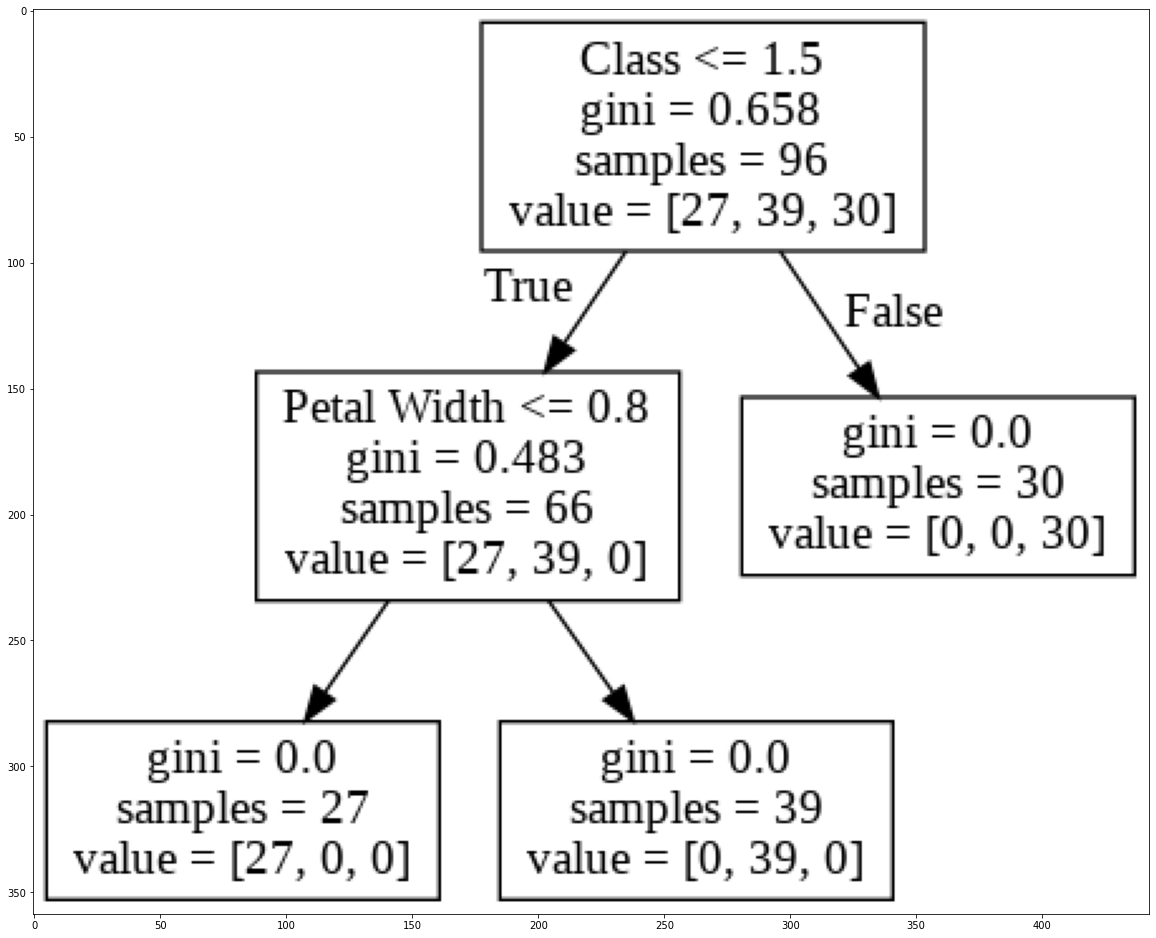

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

**menghitung prediksi model**

In [ ]:
predictedTree = model1.predict(X_test)

**menentukan akurasi skor dari prediksi**

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictedTree)

1.0

***COBA COBA***

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test)
yhat[0:5]

array([2, 0, 2, 2, 0])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

1.0

**menampilkan matriks**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



**####Gini Variation####**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model2, 'tree_entro.dot', feature_names = FEATURE_NAMES)

In [ ]:
!dot -Tpng tree_entro.dot -o tree_entro.png

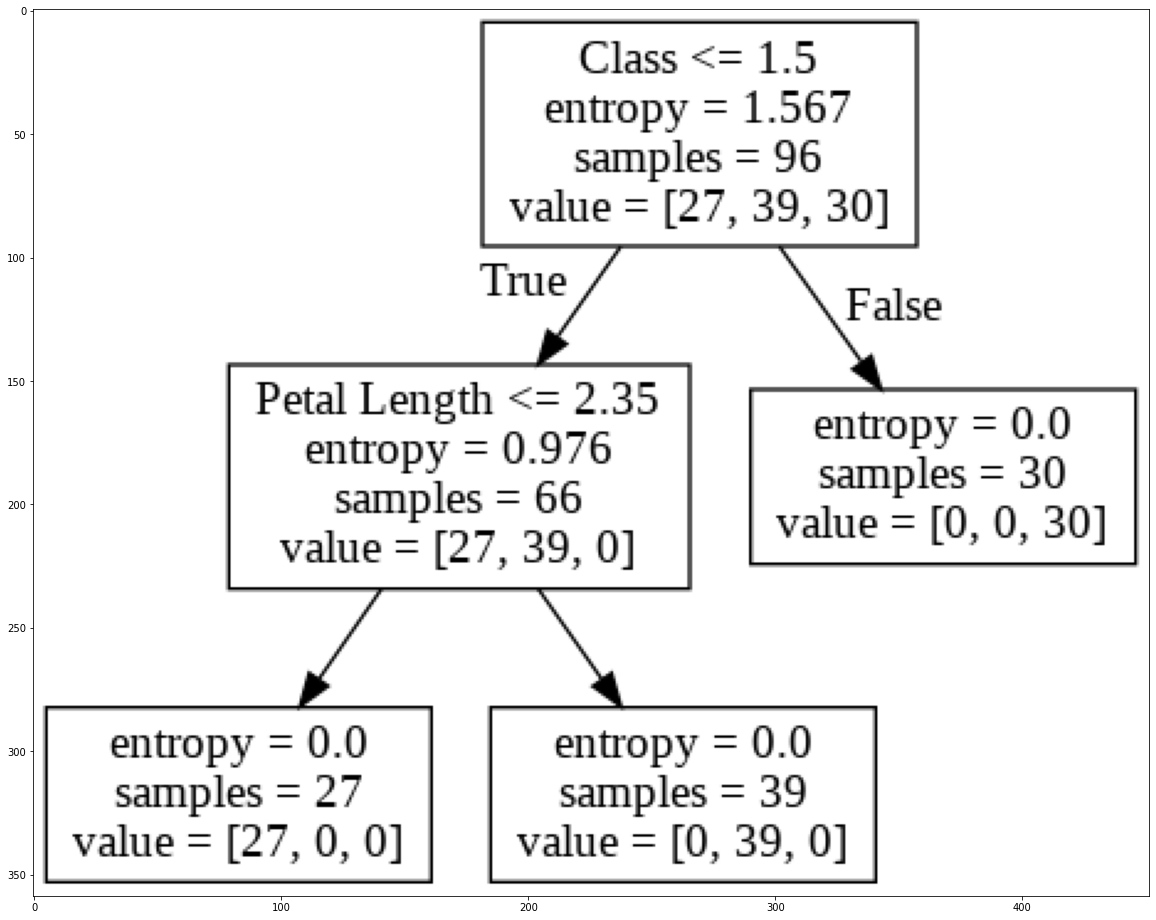

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('tree_entro.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [ ]:
predictedTree = model2.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictedTree)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

